<a href="https://colab.research.google.com/github/pkrc267/IndoorLocalization/blob/master/wifi_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from sklearn.cluster import KMeans
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Read data and change Address column value

In [0]:
frame = pd.read_csv("/content/drive/My Drive/rssiDblock.csv")

In [40]:
frame.head()

,Name,Address,Company,Signal Level,Frequency,Channel,Security,Cipher,BSS Type,WPS Support,Time,Longitude,Latitude,X,Y,Z
0,BPGC-NAB,70:EA:1A:22:8F:E0,"Cisco Systems, Inc",-41,2437,6,None,None,Infrastructure,No,12/02/2020 23:28:27,NaN,NaN,0,6,0
1,BPGC-NAB,08:4F:A9:10:4B:80,NaN,-49,2462,11,None,None,Infrastructure,No,12/02/2020 23:28:27,NaN,NaN,0,6,0
2,BPGC-NAB,00:A3:8E:60:F2:A0,"Cisco Systems, Inc",-72,2462,11,None,None,Infrastructure,No,12/02/2020 23:28:33,NaN,NaN,0,6,0
3,BPGC-WIFI,40:01:7A:B1:00:40,"Cisco Systems, Inc",-70,2462,11,None,None,Infrastructure,No,12/02/2020 23:26:38,NaN,NaN,0,6,0
4,BPGC-NAB,70:EA:1A:22:A9:A0,"Cisco Systems, Inc",-66,2437,6,None,None,Infrastructure,No,12/02/2020 23:30:27,NaN,NaN,0,6,0


function for modifying the **'Address'** field to integer

In [0]:
def macToHex(address):
  mac_int = int(address.translate(str.maketrans("","", ":.- ")), 16)
  return mac_int

In [0]:
frame['MAC'] = frame['Address'].apply(macToHex)

In [43]:
frame.head()

,Name,Address,Company,Signal Level,Frequency,Channel,Security,Cipher,BSS Type,WPS Support,Time,Longitude,Latitude,X,Y,Z,MAC
0,BPGC-NAB,70:EA:1A:22:8F:E0,"Cisco Systems, Inc",-41,2437,6,None,None,Infrastructure,No,12/02/2020 23:28:27,NaN,NaN,0,6,0,124150763130848
1,BPGC-NAB,08:4F:A9:10:4B:80,NaN,-49,2462,11,None,None,Infrastructure,No,12/02/2020 23:28:27,NaN,NaN,0,6,0,9138231856000
2,BPGC-NAB,00:A3:8E:60:F2:A0,"Cisco Systems, Inc",-72,2462,11,None,None,Infrastructure,No,12/02/2020 23:28:33,NaN,NaN,0,6,0,702468387488
3,BPGC-WIFI,40:01:7A:B1:00:40,"Cisco Systems, Inc",-70,2462,11,None,None,Infrastructure,No,12/02/2020 23:26:38,NaN,NaN,0,6,0,70375097565248
4,BPGC-NAB,70:EA:1A:22:A9:A0,"Cisco Systems, Inc",-66,2437,6,None,None,Infrastructure,No,12/02/2020 23:30:27,NaN,NaN,0,6,0,124150763137440


Check number of unique values of MAC and Address to verify unique mappings

In [44]:
if frame.MAC.nunique() == frame.Address.nunique():
  print(True)

True


Removing the GPS columns from dataframe and displaying the new dataframe

In [45]:
del frame['Longitude']
del frame['Latitude']
del frame['Cipher']
del frame['Company']
del frame['Security']
del frame['WPS Support']
del frame['BSS Type']
frame.head()

,Name,Address,Signal Level,Frequency,Channel,Time,X,Y,Z,MAC
0,BPGC-NAB,70:EA:1A:22:8F:E0,-41,2437,6,12/02/2020 23:28:27,0,6,0,124150763130848
1,BPGC-NAB,08:4F:A9:10:4B:80,-49,2462,11,12/02/2020 23:28:27,0,6,0,9138231856000
2,BPGC-NAB,00:A3:8E:60:F2:A0,-72,2462,11,12/02/2020 23:28:33,0,6,0,702468387488
3,BPGC-WIFI,40:01:7A:B1:00:40,-70,2462,11,12/02/2020 23:26:38,0,6,0,70375097565248
4,BPGC-NAB,70:EA:1A:22:A9:A0,-66,2437,6,12/02/2020 23:30:27,0,6,0,124150763137440


In [0]:
frame["Final"] = frame["MAC"].astype(str)+frame['X'].astype(str)+frame['Y'].astype(str)+frame['Z'].astype(str)
frame["Final"] = frame["Final"].str.replace('-',"").astype(int)

In [47]:
frame.head()

,Name,Address,Signal Level,Frequency,Channel,Time,X,Y,Z,MAC,Final
0,BPGC-NAB,70:EA:1A:22:8F:E0,-41,2437,6,12/02/2020 23:28:27,0,6,0,124150763130848,124150763130848060
1,BPGC-NAB,08:4F:A9:10:4B:80,-49,2462,11,12/02/2020 23:28:27,0,6,0,9138231856000,9138231856000060
2,BPGC-NAB,00:A3:8E:60:F2:A0,-72,2462,11,12/02/2020 23:28:33,0,6,0,702468387488,702468387488060
3,BPGC-WIFI,40:01:7A:B1:00:40,-70,2462,11,12/02/2020 23:26:38,0,6,0,70375097565248,70375097565248060
4,BPGC-NAB,70:EA:1A:22:A9:A0,-66,2437,6,12/02/2020 23:30:27,0,6,0,124150763137440,124150763137440060


In [0]:
export_csv = frame.to_csv (r'/content/drive/My Drive/newRssiDblock.csv', index = None, header=True)

# Moving to Plotting

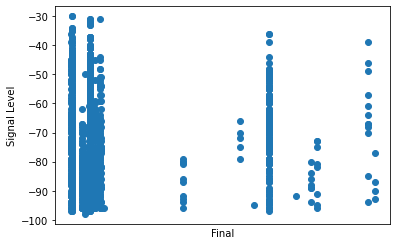

In [49]:
import matplotlib.pyplot as plt

plt.scatter(frame['Final'], frame['Signal Level'])
plt.xlabel('Final')
plt.ylabel('Signal Level')
plt.xticks([])
plt.show()

# K-means

Making cluster on the basis of 3 features

In [50]:
kmeans=KMeans(n_clusters=2)

X = frame[["Final",'Signal Level','X','Y','Z']]

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Getting cluster labels on the basis of prediction

In [0]:
cluster_label = kmeans.predict(X)

Checking cluster centroids

In [52]:
kmeans.cluster_centers_

array([[ 9.00610011e+16, -7.46995367e+01,  4.53077432e+00,
         2.49172733e+00,  4.81138319e-01],
       [ 1.28587909e+18, -7.27722222e+01,  1.06055556e+01,
         3.35555556e+00,  4.33333333e-01]])

extracting columns of centroids for plotting purposes

In [0]:
C_x = kmeans.cluster_centers_[:,[2]]
C_y = kmeans.cluster_centers_[:,[3]]
C_z = kmeans.cluster_centers_[:,[4]]

Text(0.5, 0, 'Z')

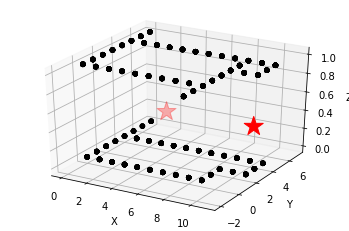

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(frame['X'], frame['Y'], frame['Z'], c='black', marker='o')
ax.scatter(C_x, C_y, C_z, marker='*', s=400, c='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Cluster Centers' **MAC addresses**

In [55]:
print(kmeans.cluster_centers_[:,[0]])

[[9.00610011e+16]
 [1.28587909e+18]]


Cluster Centers' **Signal Strength**

In [56]:
kmeans.cluster_centers_[:,[1]]

array([[-74.69953673],
       [-72.77222222]])

Plotting Signal strength vs Floor

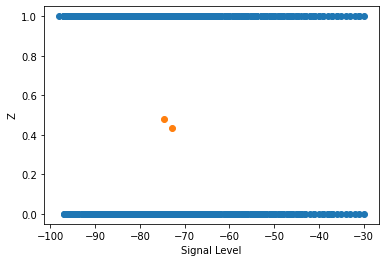

In [57]:
plt.scatter(frame['Signal Level'], frame['Z'])
plt.scatter(kmeans.cluster_centers_[:,[1]], kmeans.cluster_centers_[:,[4]])
plt.xlabel('Signal Level')
plt.ylabel('Z')
#plt.xticks([])
plt.show()

In [58]:
print(cluster_label)

[0 0 0 ... 1 1 0]


Printing in a loop

In [0]:
frameCopy = frame

In [0]:
frameCopy['predictedFloor'] = cluster_label

In [61]:
print(frameCopy[['Z', 'predictedFloor']])

      Z  predictedFloor
0     0               0
1     0               0
2     0               0
3     0               0
4     0               0
...  ..             ...
1686  1               1
1687  1               1
1688  1               1
1689  1               1
1690  1               0

[1691 rows x 2 columns]


In [0]:
confusion_Matrix = pd.crosstab(frameCopy['Z'], frameCopy['predictedFloor'])

In [63]:
print(confusion_Matrix)

predictedFloor    0    1
Z                       
0               784  102
1               727   78


In [64]:
tp,tn,fp,fn = confusion_Matrix.iat[1,1],confusion_Matrix.iat[0,0],confusion_Matrix.iat[0,1],confusion_Matrix.iat[1,0]

accuracy = (tp+tn)/(tp+tn+fp+fn)

print(accuracy*100)

50.97575399172087


# Changing the learning model
* **Random Forest Classifier**



### Random Forest
### *With Validation concept*
Preparing Training & Testing set



In [0]:
from sklearn.model_selection import train_test_split

X = frameCopy[['Signal Level', 'Final','X','Y']]
y = frameCopy['Z']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [118]:
print(train_X.shape)
print(val_X.shape)
print(train_X.columns)

(1183, 4)
(508, 4)
Index(['Signal Level', 'Final', 'X', 'Y'], dtype='object')


Starting Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model_forest = RandomForestClassifier(max_depth=2, random_state=0)
model_forest.fit(train_X, train_y)

rf_prediction = model_forest.predict(val_X)

In [121]:
confusion_Matrix_RF = pd.crosstab(val_y, rf_prediction)
print(confusion_Matrix_RF)

col_0    0    1
Z              
0      244   27
1      128  109


In [122]:
#tp,tn,fp,fn = confusion_Matrix_RF.iat[1,1],confusion_Matrix_RF.iat[0,0],confusion_Matrix_RF.iat[0,1],confusion_Matrix_RF.iat[1,0]
#accuracy = (tp+tn)/(tp+tn+fp+fn)
#print("Accuracy: ", accuracy*100)

nErrors = (val_y != rf_prediction).sum()
accuracy = 1.0 - nErrors / val_y.shape[0]
print("Accuracy: ", accuracy*100)

Accuracy:  69.48818897637796


### Random Forest
### *Without validation concept.*

In [137]:
trainSet, testSet = train_test_split(frame, test_size = 0.3)

#model_forest = RandomForestClassifier(max_depth=2, random_state=0)
#model_forest.fit(train_X, train_y)

trainData = pd.DataFrame.to_numpy(trainSet[['Signal Level', 'Final', 'X', 'Y']])
trainTarget = pd.DataFrame.to_numpy(trainSet[['Z']]).ravel()
testData = pd.DataFrame.to_numpy(testSet[['Signal Level', 'Final', 'X', 'Y']])
testTarget = pd.DataFrame.to_numpy(testSet[['Z']]).ravel()

model_forest_2 = RandomForestClassifier(random_state=0)
model_forest_2.fit(trainData, trainTarget)

predictedValues = model_forest_2.predict(testData)

nErrors = (testTarget != predictedValues).sum()
accuracy = 1.0 - nErrors / testTarget.shape[0]
print("Accuracy: ", accuracy*100)

Accuracy:  73.22834645669292


# Changing the learning model
* **KNN Classifier**



In [138]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(trainData, trainTarget)

knn_prediction = model_knn.predict(testData)

print("Accuracy: ",model_knn.score(testData,testTarget) * 100)
#nErrorsKNN = (testTarget != knn_prediction).sum()
#accuracy = 1.0 - nErrorsKNN / testTarget.shape[0]
#print("Accuracy: ", accuracy*100)

Accuracy:  46.8503937007874


# Changing the learning model
* **MLP**



In [140]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(random_state=0)
model_mlp.fit(trainData,trainTarget)

mlp_prediction = model_mlp.predict(testData)

print("Accuracy: ", model_mlp.score(testData,testTarget)*100)

Accuracy:  53.34645669291339


# Changing the learning model
* **SVM**



In [143]:
from sklearn.svm import SVC

model_svc = SVC(random_state=0)
model_svc.fit(trainData,trainTarget)

svc_prediction = model_svc.predict(testData)

print("Accuray: ", model_svc.score(testData,testTarget)*100)

Accuray:  53.14960629921261


# Changing the learning model
* **Stochastic Gradient Descent**



In [145]:
from sklearn.linear_model import SGDClassifier

model_sgdc = SGDClassifier(random_state = 0)
model_sgdc.fit(trainData,trainTarget)

sgdc_prediction = model_sgdc.predict(testData)

print("Accuracy: ", model_sgdc.score(testData,testTarget)*100)

Accuracy:  46.653543307086615


# Changing the learning model
* **Gaussian Process Classifier**



In [146]:
from sklearn.gaussian_process import GaussianProcessClassifier

model_gpc = GaussianProcessClassifier(random_state=0)
model_gpc.fit(trainData,trainTarget)

gpc_prediction = model_gpc.predict(testData)

print("Accuracy: ", model_gpc.score(testData,testTarget)*100)

Accuracy:  43.503937007874015


# Changing the learning model
* **Decision Tree**



In [148]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=0)
model_dtc.fit(trainData,trainTarget)

dtc_prediction = model_dtc.predict(testData)

print("Accuracy: ", model_dtc.score(testData,testTarget)*100)

Accuracy:  73.22834645669292


# Changing the learning model
* **Gaussian Naive Bayes**



In [150]:
from sklearn.naive_bayes import GaussianNB

model_gnbc = GaussianNB()
model_gnbc.fit(trainData,trainTarget)

gnbc_prediction = model_gnbc.predict(testData)

print("Accuracy: ", model_gnbc.score(testData,testTarget)*100)

Accuracy:  53.34645669291339
